In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
df = pd.read_csv("Data/Train_TEC_mar17.csv")
df.head()

,Date,Month,Year,Time,LT,TEC
0,1,3,2017,0.016389,5.311333,2.067562
1,1,3,2017,0.049722,5.344670,2.082707
2,1,3,2017,0.083056,5.378006,2.004272
3,1,3,2017,0.116389,5.411343,1.736569
4,1,3,2017,0.149722,5.444679,1.758503


In [32]:
df.fillna(0.000000, inplace = True)

In [33]:
df.drop(["Date", "Month", "Year", "Time", "LT"], axis = 1, inplace = True)

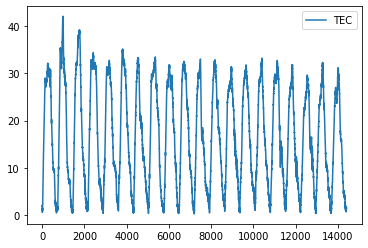

In [34]:
data = df[['TEC']]
data.plot(y='TEC')

In [35]:
train = data[:-1440]
test = data[-1440:]

In [36]:
train.tail()

,TEC
12955,1.306469
12956,1.408271
12957,1.135789
12958,0.969443
12959,1.205574


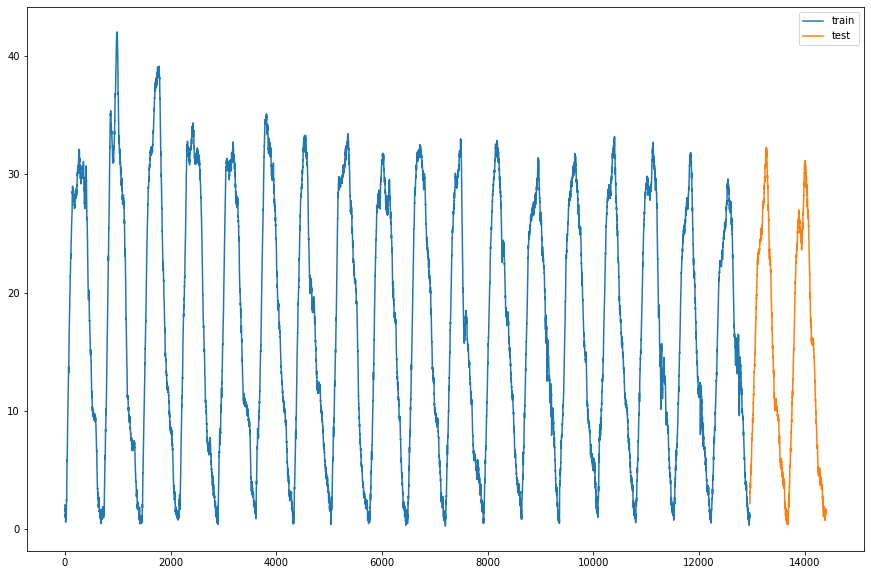

In [39]:
ax = train.plot(figsize=(15,10))
test.plot(ax=ax)
plt.legend(['train', 'test'])
plt.show()

In [40]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [52]:
train_sc_df = pd.DataFrame(train_sc, columns=['Y'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Y'], index=test.index)

for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)

X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)

X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

X_train = X_train.values
y_train = y_train.values

X_test = X_test.values
y_test = y_test.values

In [42]:
print('Train size: (%d x %d)'%(X_train.shape[0], X_train.shape[1]))
print('Test size: (%d x %d)'%(X_test.shape[0], X_test.shape[1]))

Train size: (12959 x 1)
Test size: (1439 x 1)


In [43]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K
from sklearn.metrics import r2_score

In [44]:
K.clear_session()
model = Sequential()
model.add(Dense(1, input_shape=(X_test.shape[1],), activation='tanh', kernel_initializer='lecun_uniform'))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
12959/12959 [==============================] - 1s 39us/step - loss: 0.4772
Epoch 2/20
12959/12959 [==============================] - 0s 32us/step - loss: 0.1300
Epoch 3/20
12959/12959 [==============================] - 0s 32us/step - loss: 0.0892
Epoch 4/20
12959/12959 [==============================] - 0s 32us/step - loss: 0.0522
Epoch 5/20
12959/12959 [==============================] - 0s 32us/step - loss: 0.0238
Epoch 6/20
12959/12959 [==============================] - 0s 32us/step - loss: 0.0085
Epoch 7/20
12959/12959 [==============================] - 0s 32us/step - loss: 0.0026
Epoch 8/20
12959/12959 [==============================] - 0s 32us/step - loss: 0.0010
Epoch 9/20
12959/12959 [==============================] - 0s 32us/step - loss: 7.9507e-04
Epoch 10/20
12959/12959 [==============================] - 0s 32us/step - loss: 7.7814e-04
Epoch 11/20
12959/12959 [==============================] - 0s 32us/step - loss: 7.7816e-04
Epoch 12/20
12959/12959 [===============

R-Squared: 0.999104


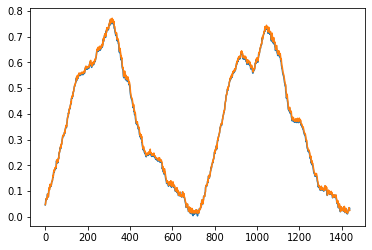

In [50]:
y_pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)
print('R-Squared: %f'%(r2_score(y_test, y_pred)))

In [46]:
K.clear_session()
model = Sequential()
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
12959/12959 [==============================] - 1s 46us/step - loss: 0.0015
Epoch 2/20
12959/12959 [==============================] - 1s 41us/step - loss: 4.8285e-05
Epoch 3/20
12959/12959 [==============================] - 1s 41us/step - loss: 5.2300e-05
Epoch 4/20
12959/12959 [==============================] - 1s 41us/step - loss: 5.7055e-05
Epoch 5/20
12959/12959 [==============================] - 1s 41us/step - loss: 6.7774e-05
Epoch 6/20
12959/12959 [==============================] - 1s 41us/step - loss: 7.6292e-05
Epoch 7/20
12959/12959 [==============================] - 1s 41us/step - loss: 7.9165e-05
Epoch 8/20
12959/12959 [==============================] - 1s 41us/step - loss: 8.5333e-05
Epoch 9/20
12959/12959 [==============================] - 1s 41us/step - loss: 8.3728e-05
Epoch 10/20
12959/12959 [==============================] - 1s 41us/step - loss: 6.8379e-05
Epoch 11/20
12959/12959 [==============================] - 1s 41us/step - loss: 6.6154e-05
Epoch 12/20


R-Squared: 0.999104


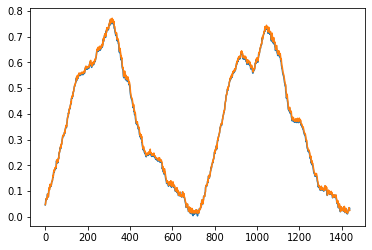

In [47]:
y_pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)
print('R-Squared: %f'%(r2_score(y_test, y_pred)))